#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 7
### Due: Monday, Mar 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 21th.

---

## Problem 1

**Fitting Data with MCMC**

Start with the code snipplet below to generate data.
Then, following the approach shown in `lecture_7.ipynb`, using either `emcee` or `pymc3`, fit a straight line to the data. Create the trace plots.

- Describe/ discuss where you should cut off burn-in. 
- Compute the autocorrelation length of the chain. 
- Using `corner`, make a corner plot that has labels, shows titles, and has $68\%$ and $95\%$ quantiles and levels. 








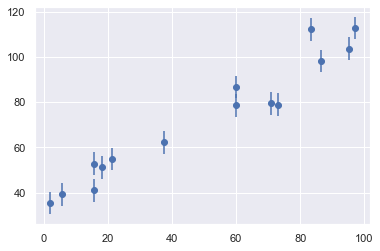

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set() # for plot formatting

def make_data(intercept, slope, N=15, dy=5, rseed=42):
    rand = np.random.RandomState(rseed)
    x = 100 * rand.rand(N)
    y = intercept + slope * x
    y += dy * rand.randn(N)
    return x, y, dy * np.ones_like(x)

theta_true = (37, 0.75)
x, y, dy = make_data(*theta_true)

plt.errorbar(x, y, dy, fmt='o');


### Solution

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
with pm.Model() as model:
    # Define priors
    # mx + b
    b = pm.Normal("b", 0, sigma=20)
    m = pm.Normal("m", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=b + m * x, sigma=dy, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(draws=12000, tune=1000, cores=1)


You can find the C code in this temporary file: C:\Users\serat\AppData\Local\Temp\theano_compilation_error_mm6xf1v1


Exception: ('Compilation failed (return status=1): C:\\Users\\serat\\AppData\\Local\\Temp\\ccQp4403.s: Assembler messages:\r. C:\\Users\\serat\\AppData\\Local\\Temp\\ccQp4403.s:112: Error: invalid register for .seh_savexmm\r. ', 'FunctionGraph(Elemwise{gt,no_inplace}(TensorConstant{(15,) of 5.0}, <TensorType(int8, (True,))>))')

In [4]:
az.plot_trace(trace)

NameError: name 'trace' is not defined

In [5]:
# plot 
fig = plt.figure(figsize=(9, 5))
fig.subplots_adjust(left=0.11, right=0.95, 
                    wspace=0.35, bottom=0.18)

chainE = trace['m']
M = np.size(chainE)

ax1 = fig.add_subplot(121)
xgrid = np.linspace(1, M, M)
plt.plot(xgrid, chainE)
ax1.axis([0, M, np.min(chainE), 1.1*np.max(chainE)])
plt.xlabel('number')
plt.ylabel('chain')

# plot running mean: 
meanC = [np.mean(chainE[:int(N)]) for N in xgrid]
ax1.plot(xgrid, meanC, c='red', label='chain mean') 
ax1.legend()
ax1.set_title("m")
ax1.axvline(1000, color='black')

chainE = trace['b']
M = np.size(chainE)

ax2 = fig.add_subplot(122)
plt.plot(xgrid, chainE)
ax2.axis([0, M, np.min(chainE), 1.1*np.max(chainE)])
plt.xlabel('number')
plt.ylabel('chain')

# plot running mean: 
meanC = [np.mean(chainE[:int(N)]) for N in xgrid]
ax2.plot(xgrid, meanC, c='red', label='chain mean') 
ax2.legend()
ax2.set_title("b")
ax2.axvline(1000, color='black')

plt.show()

NameError: name 'trace' is not defined

<Figure size 648x360 with 0 Axes>

In [6]:
az.plot_autocorr(trace, figsize=(9, 9))

import corner

corner.corner(np.array([trace['m'][1000:], trace['b'][1000:]]).T, labels=['m', 'b'], 
              levels=[.68,.95], quantiles=[.68,.95])
plt.show()

plt.errorbar(x, y, dy, fmt='o')
plt.plot(x, x*np.mean(trace['m']) + np.mean(trace['b']))
plt.show()

NameError: name 'trace' is not defined